<a href="https://colab.research.google.com/github/kgpark88/ems/blob/master/energy_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 에너지 데이터 분석

## 1. 넘파이(Numpy)
NumPy(Numerical Python)는 데이터 분석을 포함해 수학과 과학연산을 위한 파이썬 기본 패키지로 고성능의 다차원 배열 객체와 다양한 객체에 대해 고속 연산을 가능하게 합니다.


Numpy 라이브러리 임포트

In [ ]:
import numpy as np

파이썬 리스트(list) 정의

In [ ]:
lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

리스트(list)를 Numpy array 로 변환

In [ ]:
arr = np.array(lst)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

통계 계산 및 출력

In [ ]:
np.median(arr)

5.5

In [ ]:
print('Mean:', arr.mean())
print('Median:', np.median(arr))
print('Range (Max - min):', np.ptp(arr))
print('Standard deviation:', arr.std())
print('80th percentile:', np.percentile(arr, 80))
print('0.2-quantile:', np.quantile(arr, 0.2))

Mean: 5.5
Median: 5.5
Range (Max - min): 9
Standard deviation: 2.8722813232690143
80th percentile: 8.2
0.2-quantile: 2.8000000000000003


# 2. 판다스(Pandas)
Pandas는 데이타 분석을 위해 널리 사용되는 파이썬 라이브러리 패키지입니다. 
데이터프레임 자료구조를 사용하여, 데이터 분석에 있어 높은 수준의 성능을 발휘합니다. 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

datetime 인덱스와 레이블이 있는 열을 가지고 있는 numpy 배열을 전달하여 데이터프레임을 만듭니다.

In [ ]:
dates = pd.date_range('20200101', periods=12)

In [ ]:
dates

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
data = np.random.randint(0,100,(12,3))

In [ ]:
df = pd.DataFrame(data=data, index=dates, columns=['power usage','gas usage','water usage'])

In [ ]:
df.head()

,power usage,gas usage,water usage
2020-01-01,35,74,86
2020-01-02,6,15,84
2020-01-03,27,1,82
2020-01-04,17,45,84
2020-01-05,6,60,44


In [ ]:
df.tail()

,power usage,gas usage,water usage
2020-01-08,77,90,44
2020-01-09,18,24,74
2020-01-10,13,70,15
2020-01-11,5,10,71
2020-01-12,21,57,41


인덱스 (index), 열 (column) 그리고 numpy 데이터에 대한 세부 정보를 봅니다.

In [ ]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df.columns

Index(['power usage', 'gas usage', 'water usage'], dtype='object')

In [ ]:
df.values

array([[35, 74, 86],
       [ 6, 15, 84],
       [27,  1, 82],
       [17, 45, 84],
       [ 6, 60, 44],
       [93, 69, 39],
       [10, 92, 20],
       [77, 90, 44],
       [18, 24, 74],
       [13, 70, 15],
       [ 5, 10, 71],
       [21, 57, 41]])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2020-01-01 to 2020-01-12
Freq: D
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   power usage  12 non-null     int64
 1   gas usage    12 non-null     int64
 2   water usage  12 non-null     int64
dtypes: int64(3)
memory usage: 384.0 bytes


In [ ]:
df.dtypes

power usage    int64
gas usage      int64
water usage    int64
dtype: object

Null 데이터 확인

In [ ]:
df.isnull().sum()

power usage    0
gas usage      0
water usage    0
dtype: int64

In [ ]:
df.describe()

,power usage,gas usage,water usage
count,12.000000,12.000000,12.000000
mean,27.333333,50.583333,57.000000
std,28.582682,31.294665,26.041924
min,5.000000,1.000000,15.000000
25%,9.000000,21.750000,40.500000
50%,17.500000,58.500000,57.500000
75%,29.000000,71.000000,82.500000
max,93.000000,92.000000,86.000000


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
power usage,12.0,27.333333,28.582682,5.0,9.00,17.5,29.0,93.0
gas usage,12.0,50.583333,31.294665,1.0,21.75,58.5,71.0,92.0
water usage,12.0,57.000000,26.041924,15.0,40.50,57.5,82.5,86.0


Column(열) 선택

In [ ]:
df['power usage']

2020-01-01    35
2020-01-02     6
2020-01-03    27
2020-01-04    17
2020-01-05     6
2020-01-06    93
2020-01-07    10
2020-01-08    77
2020-01-09    18
2020-01-10    13
2020-01-11     5
2020-01-12    21
Freq: D, Name: power usage, dtype: int64

In [ ]:
df[['power usage', 'gas usage']]

,power usage,gas usage
2020-01-01,35,74
2020-01-02,6,15
2020-01-03,27,1
2020-01-04,17,45
2020-01-05,6,60
2020-01-06,93,69
2020-01-07,10,92
2020-01-08,77,90
2020-01-09,18,24
2020-01-10,13,70


새 컬럼 생성하기

In [ ]:
df['energy usage'] = df['power usage'] + df['power usage']

In [ ]:
df

,power usage,gas usage,water usage,energy usage
2020-01-01,35,74,86,70
2020-01-02,6,15,84,12
2020-01-03,27,1,82,54
2020-01-04,17,45,84,34
2020-01-05,6,60,44,12
2020-01-06,93,69,39,186
2020-01-07,10,92,20,20
2020-01-08,77,90,44,154
2020-01-09,18,24,74,36
2020-01-10,13,70,15,26


컬럼 삭제하기

In [ ]:
df = df.drop('energy usage', axis=1)

상관 관계 확인

In [ ]:
df.corr()

,power usage,gas usage,water usage
power usage,1.000000,0.416356,-0.160971
gas usage,0.416356,1.000000,-0.681450
water usage,-0.160971,-0.681450,1.000000


# 맷플롯립(Matplotlib)
파이썬에서 데이터를 차트나 플롯(Plot)으로 그려주는 라이브러리 패키지로서   
가장 많이 사용되는 데이타 시각화(Data Visualization) 패키지입니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

그래프 스타일

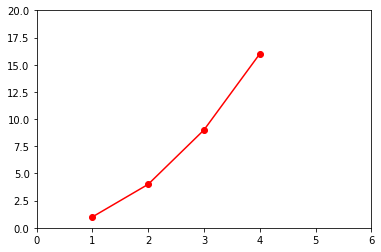

In [ ]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro-')
plt.axis([0, 6, 0, 20])
plt.show()

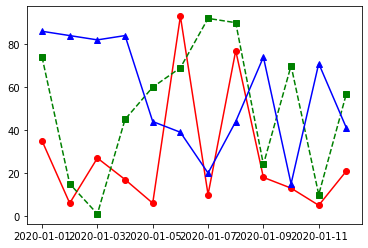

In [ ]:
plt.plot(df['power usage'], 'ro-', df['gas usage'], 'gs--',  df['water usage'], 'b^-')
plt.show()

스캐터 플롯

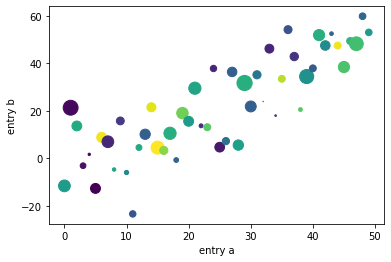

In [ ]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()


카테고리 플롯

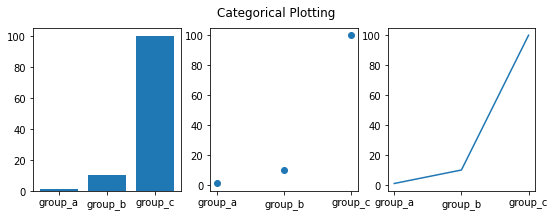

In [ ]:
|names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)

plt.suptitle('Categorical Plotting')
plt.show()


# 씨본(Seaborn) 
Matplotlib을 기반으로 다양한 색상 테마와  통계용 차트 등의 기능을 추가한 시각화 패키지입니다. 


In [ ]:
import seaborn as sns

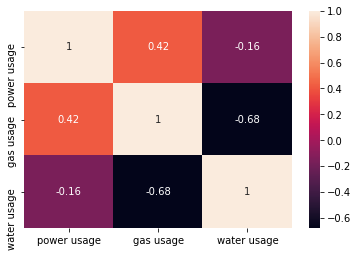

In [ ]:
sns.heatmap(df.corr(), annot=True)

카운트 플롯

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


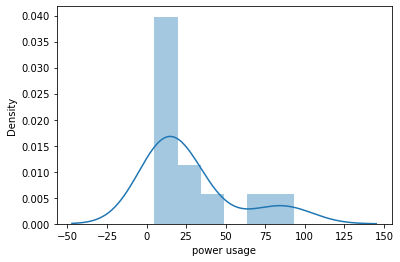

In [ ]:
sns.distplot(df['power usage'])

Count Plot

상관관계 확인

In [ ]:
df.corr()

,power usage,gas usage,water usage
power usage,1.000000,0.416356,-0.160971
gas usage,0.416356,1.000000,-0.681450
water usage,-0.160971,-0.681450,1.000000


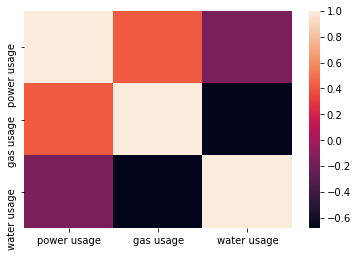

In [ ]:
import seaborn as sns
sns.heatmap(df.corr())

# 5.전력사용량 분석

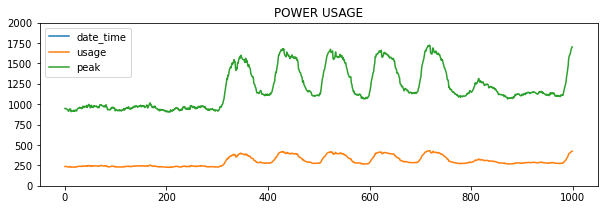

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# df = pd.read_csv('data.csv')  
df = pd.read_csv('https://raw.githubusercontent.com/kgpark88/ems/master/data.csv')
df.plot(title='POWER USAGE',  figsize=(10, 3), ylim=(0,2000) )
plt.show()

# 6. 선형회귀  
종속 변수 y와 한 개 이상의 독립 변수 X와의 선형 상관 관계를 모델링 하는 회귀분석 기법

기울기(slope) :  0.9200457304535211
절편(intercept) :  -2.024707604744151
상관계수(r_value) :  0.9950415352828844
유의확률(p_value) :  2.3409613797567155e-11
134개 => 예측량 121.26142027602768kWh


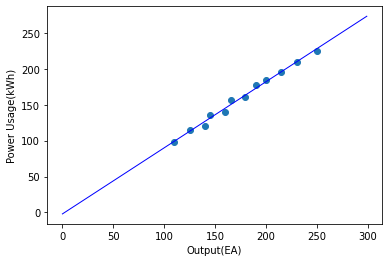

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 생산량
output = [110, 125, 140, 145, 160, 166, 179, 190, 200, 215, 230, 250]
# 전력사용량
power_usage = [98, 115, 120, 136, 140, 156, 160, 177, 185, 195, 210, 225]
# p-value   : 유의 확률, 일반적으로 0.05 미만일 때 유의미
slope, intercept, r_value, p_value, stderr = stats.linregress(output, power_usage)

# 생산량 134개일 때 전기사용량 예측
product = 134
print("기울기(slope) : ", slope)
print("절편(intercept) : ", intercept)
print("상관계수(r_value) : ", r_value)
print("유의확률(p_value) : ", p_value )
print("{}개 => 예측량 {}kWh".format(
    product, product*slope + intercept))

plt.scatter(output, power_usage) 
x = np.arange(0, 300)
y = [(slope*num + intercept) for num in x]
plt.plot(x, y, 'b', lw=1) 
plt.xlabel("Output(EA)")
plt.ylabel("Power Usage(kWh)")
plt.show()

# 7. 에너지 가격 분석 
https://www.eia.gov/opendata/   
① 라이브러리 설치 : !pip install EIA-python  
② Email 주소를 입력하고 API 신청  
③ Email로 받은 API키를 프로그램 소스코드에 추가  


In [ ]:
!pip install EIA-python

In [ ]:
import eia
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def retrieve_time_series(api, series_ID):
    """
    Return the time series dataframe, based on API and unique Series ID
    api: API that we're connected to
    series_ID: string. Name of the series that we want to pull from the EIA API
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=series_ID)
    ##Create a pandas dataframe from the retrieved time series
    df = pd.DataFrame(series_search)
    return df

In [ ]:
def decompose_time_series(series):
    """
    Decompose a time series and plot it in the console
    Arguments: 
        series: series. Time series that we want to decompose
    Outputs: 
        Decomposition plot in the console
    """
    result = seasonal_decompose(series, model='additive')
    result.plot()
    pyplot.show()

In [ ]:
def augmented_dickey_fuller_statistics(time_series):
    """
    Run the augmented Dickey-Fuller test on a time series
    to determine if it's stationary.
    Arguments: 
        time_series: series. Time series that we want to test 
    Outputs: 
        Test statistics for the Augmented Dickey Fuller test in 
        the console 
    """
    result = adfuller(time_series.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value)) 

In [ ]:
def calculate_model_accuracy_metrics(actual, predicted):
    """
    Output model accuracy metrics, comparing predicted values
    to actual values.
    Arguments:
        actual: list. Time series of actual values.
        predicted: list. Time series of predicted values
    Outputs:
        Forecast bias metrics, mean absolute error, mean squared error,
        and root mean squared error in the console
    """
    #Calculate forecast bias
    forecast_errors = [actual[i]-predicted[i] for i in range(len(actual))]
    bias = sum(forecast_errors) * 1.0/len(actual)
    print('Bias: %f' % bias)
    #Calculate mean absolute error
    mae = mean_absolute_error(actual, predicted)
    print('MAE: %f' % mae)
    #Calculate mean squared error and root mean squared error
    mse = mean_squared_error(actual, predicted)
    print('MSE: %f' % mse)
    rmse = sqrt(mse)
    print('RMSE: %f' % rmse)


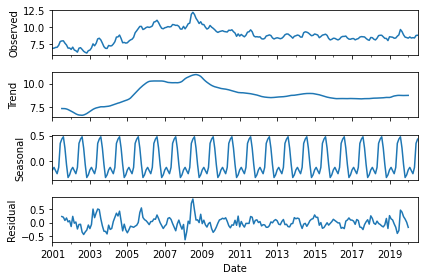

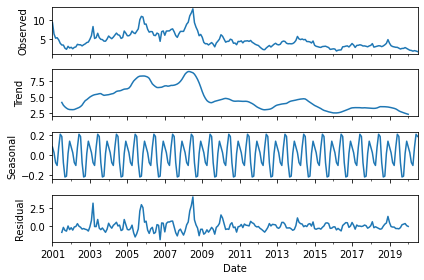

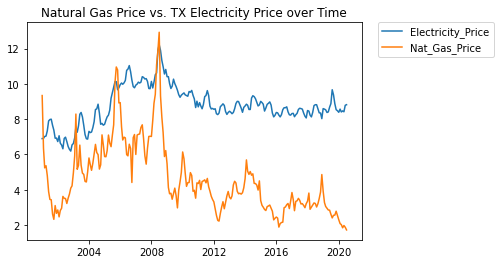

Augmented Dickey-Fuller Test: Electricity Price Time Series
ADF Statistic: -4.369254
p-value: 0.000336
Critical Values:
	1%: -3.461
	5%: -2.875
	10%: -2.574
Augmented Dickey-Fuller Test: Natural Gas Price Time Series
ADF Statistic: -7.101385
p-value: 0.000000
Critical Values:
	1%: -3.460
	5%: -2.874
	10%: -2.574
          Date  Electricity_Price  Predicted_Electricity_Price
223 2019-08-01               9.67                     8.901670
224 2019-09-01               9.37                     8.913260
225 2019-10-01               8.88                     8.924307
226 2019-11-01               8.54                     8.935338
227 2019-12-01               8.48                     8.946381
228 2020-01-01               8.39                     8.957438
229 2020-02-01               8.57                     8.968509
230 2020-03-01               8.41                     8.979593
231 2020-04-01               8.47                     8.990691
232 2020-05-01               8.42                     9.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [ ]:
#Create EIA API using your specific API key
# EIA 사이트 : https://www.eia.gov/opendata/register.php
# api_key = "EIA 사이트에서 발급받은 API KEY 입력"

api_key = "02a398e7c828a016cabba6999838132d"
api = eia.API(api_key)

#Pull the electricity price data
series_ID='ELEC.PRICE.TX-ALL.M'
electricity_df=retrieve_time_series(api, series_ID)
electricity_df.reset_index(level=0, inplace=True)
#Rename the columns for easer analysis
electricity_df.rename(columns={'index':'Date',
        electricity_df.columns[1]:'Electricity_Price'}, 
        inplace=True)
#Convert the Date column into a date object
electricity_df['Date']=pd.to_datetime(electricity_df['Date'])
#Set Date as a Pandas DatetimeIndex
electricity_df.index=pd.DatetimeIndex(electricity_df['Date'])
#Decompose the time series into parts
decompose_time_series(electricity_df['Electricity_Price'])

#Pull in natural gas time series data
series_ID='NG.N3035TX3.M'
nat_gas_df=retrieve_time_series(api, series_ID)
nat_gas_df.reset_index(level=0, inplace=True)
#Rename the columns
nat_gas_df.rename(columns={'index':'Date',
        nat_gas_df.columns[1]:'Nat_Gas_Price_MCF'}, 
        inplace=True)
#Convert the Date column into a date object
nat_gas_df['Date']=pd.to_datetime(nat_gas_df['Date'])
#Set Date as a Pandas DatetimeIndex
nat_gas_df.index=pd.DatetimeIndex(nat_gas_df['Date'])
#Decompose the time series into parts
decompose_time_series(nat_gas_df['Nat_Gas_Price_MCF'])

#Merge the two time series together based on Date Index
master_df=pd.merge(electricity_df['Electricity_Price'], nat_gas_df['Nat_Gas_Price_MCF'], 
                   left_index=True, right_index=True)
master_df.reset_index(level=0, inplace=True)

#Plot the two variables in the same plot
plt.plot(master_df['Date'], 
         master_df['Electricity_Price'], label="Electricity_Price")
plt.plot(master_df['Date'], 
         master_df['Nat_Gas_Price_MCF'], label="Nat_Gas_Price")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Natural Gas Price vs. TX Electricity Price over Time')
plt.show()

#Transform the columns using natural log
master_df['Electricity_Price_Transformed']=np.log(master_df['Electricity_Price'])
master_df['Nat_Gas_Price_MCF_Transformed']=np.log(master_df['Nat_Gas_Price_MCF'])

#In order to make the time series stationary, difference the data by 1 month
n=1
master_df['Electricity_Price_Transformed_Differenced'] = master_df['Electricity_Price_Transformed'] - master_df['Electricity_Price_Transformed'].shift(n)
master_df['Nat_Gas_Price_MCF_Transformed_Differenced'] = master_df['Nat_Gas_Price_MCF_Transformed'] - master_df['Nat_Gas_Price_MCF_Transformed'].shift(n)

#Run each differenced time series thru the Augmented Dickey Fuller test
print('Augmented Dickey-Fuller Test: Electricity Price Time Series')
augmented_dickey_fuller_statistics(master_df['Electricity_Price_Transformed_Differenced'].dropna())
print('Augmented Dickey-Fuller Test: Natural Gas Price Time Series')
augmented_dickey_fuller_statistics(master_df['Nat_Gas_Price_MCF_Transformed_Differenced'].dropna())

#Conver the dataframe to a numpy array
master_array=np.array(master_df[['Electricity_Price_Transformed_Differenced', 
                                 'Nat_Gas_Price_MCF_Transformed_Differenced']].dropna())

#Generate a training and test set for building the model: 95/5 split
training_set = master_array[:int(0.95*(len(master_array)))]
test_set = master_array[int(0.95*(len(master_array))):]

#Fit to a VAR model
model = VAR(endog=training_set)
model_fit = model.fit()
#Print a summary of the model results
model_fit.summary()

#Compare the forecasted results to the real data 
prediction = model_fit.forecast(model_fit.y, steps=len(test_set))

#Merge the array data back into the master dataframe, and un-difference and back-transform
data_with_predictions=pd.DataFrame(np.vstack((training_set, 
                                    prediction))).rename(columns={0:'Electricity_Price_Transformed_Differenced_PostProcess',
                                                                  1:'Nat_Gas_Price_MCF_Transformed_Differenced_PostProcess'})
#Define which data is predicted and which isn't in the 'Predicted' column
data_with_predictions.loc[:,'Predicted']=1
data_with_predictions.loc[(data_with_predictions.index>=0) & 
                                 (data_with_predictions.index<=(len(training_set)-1)),'Predicted']=0

#Add a row of NaN at the begining of the df
data_with_predictions.loc[-1] = [None, None, None]  # adding a row
data_with_predictions.index = data_with_predictions.index + 1  # shifting index
data_with_predictions.sort_index(inplace=True) 
#Add back into the original dataframe
master_df.loc[:,'Electricity_Price_Transformed_Differenced_PostProcess'] = data_with_predictions['Electricity_Price_Transformed_Differenced_PostProcess']
master_df.loc[:,'Predicted'] = data_with_predictions['Predicted']
    
#Un-difference the data
for i in range(1,len(master_df.index)-1):
    master_df.at[i,'Electricity_Price_Transformed']= master_df.at[i-1,'Electricity_Price_Transformed']+master_df.at[i,'Electricity_Price_Transformed_Differenced_PostProcess']

#Back-transform the data
master_df.loc[:,'Predicted_Electricity_Price']=np.exp(master_df['Electricity_Price_Transformed'])

#Compare the forecasted data to the real data
print(master_df[master_df['Predicted']==1][['Date','Electricity_Price', 'Predicted_Electricity_Price']])

#Evaluate the accuracy of the results, pre un-differencing and back-transformation
calculate_model_accuracy_metrics(list(master_df[master_df['Predicted']==1]['Electricity_Price']), 
                                list(master_df[master_df['Predicted']==1]['Predicted_Electricity_Price']))
